##Unzip File From Drive


In [1]:
!unzip "/content/drive/MyDrive/FlamAssignment-20230908T145320Z-001 (1).zip" -d "/content/"

Archive:  /content/drive/MyDrive/FlamAssignment-20230908T145320Z-001 (1).zip
  inflating: /content/FlamAssignment/IMG_0854.JPG  
  inflating: /content/FlamAssignment/IMG_0853.JPG  
  inflating: /content/FlamAssignment/IMG_0846.JPG  
  inflating: /content/FlamAssignment/IMG_0838.JPG  
  inflating: /content/FlamAssignment/IMG_0839.JPG  
  inflating: /content/FlamAssignment/IMG_0852.JPG  
  inflating: /content/FlamAssignment/IMG_0787.JPG  
  inflating: /content/FlamAssignment/IMG_0851.JPG  
  inflating: /content/FlamAssignment/IMG_0850.JPG  
  inflating: /content/FlamAssignment/IMG_0849.JPG  
  inflating: /content/FlamAssignment/IMG_0842.JPG  
  inflating: /content/FlamAssignment/IMG_0844.JPG  
  inflating: /content/FlamAssignment/IMG_0791.JPG  
  inflating: /content/FlamAssignment/IMG_0792.JPG  
  inflating: /content/FlamAssignment/IMG_0793.JPG  
  inflating: /content/FlamAssignment/IMG_0794.JPG  
  inflating: /content/FlamAssignment/IMG_0841.JPG  
  inflating: /content/FlamAssignment/IM

##Sample Code

In [2]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [3]:
# Load a pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 138MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [4]:
# Load and preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = F.to_tensor(img).unsqueeze(0)
    return img

In [5]:
image_path = '/content/FlamAssignment/IMG_0794.JPG'
image = preprocess_image(image_path)

In [6]:
# Perform inference
with torch.no_grad():
    prediction = model(image)

In [7]:
# Extract bounding box coordinates and class labels
boxes = prediction[0]['boxes'].cpu().numpy()
labels = prediction[0]['labels'].cpu().numpy()

In [8]:
# Load the original image
original_image = Image.open(image_path)

In [9]:
# Draw bounding boxes on the image
draw = ImageDraw.Draw(original_image)
for box, label in zip(boxes, labels):
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='blue', width=2)
    draw.text((box[0], box[1]), f'Class {label}', fill='blue')

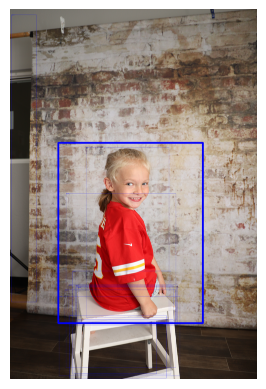

In [10]:
# Save or display the image with bounding boxes
original_image.show()

# If you want to save the image:
original_image.save('output_image.jpg')

# If you want to display the image using matplotlib:
plt.imshow(original_image)
plt.axis('off')
plt.show()


##Acurate result


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
<ipython-input-16-9945181cd2ac>:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  keep = torchvision.ops.nms(torch.tensor(filtered_boxes), torch.tensor(prediction[0]['scores'][prediction[0]['scores'] >

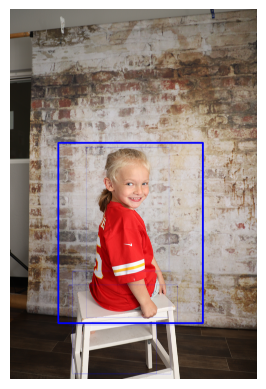

In [16]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Load a pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load and preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = F.to_tensor(img).unsqueeze(0)
    return img

image_path = '/content/FlamAssignment/IMG_0794.JPG'
image = preprocess_image(image_path)

# Perform inference
with torch.no_grad():
    prediction = model(image)

# Apply confidence threshold
confidence_threshold = 0.5
filtered_boxes = prediction[0]['boxes'][prediction[0]['scores'] > confidence_threshold].cpu().numpy()
labels = prediction[0]['labels'][prediction[0]['scores'] > confidence_threshold].cpu().numpy()

# Apply non-maximum suppression
nms_threshold = 0.5
keep = torchvision.ops.nms(torch.tensor(filtered_boxes), torch.tensor(prediction[0]['scores'][prediction[0]['scores'] > confidence_threshold]), nms_threshold)
filtered_boxes = filtered_boxes[keep]
labels = labels[keep]

# Load the original image
original_image = Image.open(image_path)

# Draw bounding boxes on the image
draw = ImageDraw.Draw(original_image)
for box, label in zip(filtered_boxes, labels):
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='blue', width=2)
    draw.text((box[0], box[1]), f'Class {label}', fill='blue')

# Save or display the image with bounding boxes
original_image.show()

# If you want to save the image:
original_image.save('output_image.jpg')

# If you want to display the image using matplotlib:
plt.imshow(original_image)
plt.axis('off')
plt.show()


<ipython-input-22-880b46a7b6ae>:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  keep = torchvision.ops.nms(torch.tensor(filtered_boxes), torch.tensor(prediction[0]['scores'][prediction[0]['scores'] > confidence_threshold]), nms_threshold)


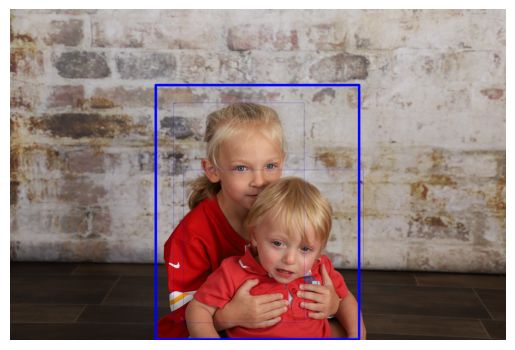

In [22]:

# Load and preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = F.to_tensor(img).unsqueeze(0)
    return img

image_path = '/content/FlamAssignment/IMG_0774.JPG'
image = preprocess_image(image_path)

# Perform inference
with torch.no_grad():
    prediction = model(image)

# Apply confidence threshold
confidence_threshold = 0.5
filtered_boxes = prediction[0]['boxes'][prediction[0]['scores'] > confidence_threshold].cpu().numpy()
labels = prediction[0]['labels'][prediction[0]['scores'] > confidence_threshold].cpu().numpy()

# Apply non-maximum suppression
nms_threshold = 0.5
keep = torchvision.ops.nms(torch.tensor(filtered_boxes), torch.tensor(prediction[0]['scores'][prediction[0]['scores'] > confidence_threshold]), nms_threshold)
filtered_boxes = filtered_boxes[keep]
labels = labels[keep]

# Load the original image
original_image = Image.open(image_path)

# Draw bounding boxes on the image
draw = ImageDraw.Draw(original_image)
for box, label in zip(filtered_boxes, labels):
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='blue', width=2)
    draw.text((box[0], box[1]), f'Class {label}', fill='blue')

# Save or display the image with bounding boxes
original_image.show()

# If you want to save the image:
original_image.save('output_image.jpg')

# If you want to display the image using matplotlib:
plt.imshow(original_image)
plt.axis('off')
plt.show()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
<ipython-input-23-3b49bd555fb3>:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  keep = torchvision.ops.nms(torch.tensor(filtered_boxes), torch.tensor(prediction[0]['scores'][prediction[0]['scores'] >

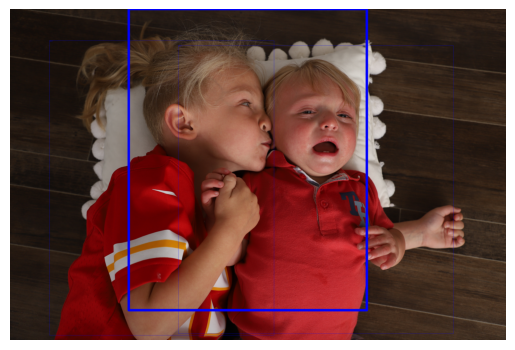

In [23]:

# Load and preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = F.to_tensor(img).unsqueeze(0)
    return img

image_path = '/content/FlamAssignment/IMG_0780.JPG'
image = preprocess_image(image_path)

# Perform inference
with torch.no_grad():
    prediction = model(image)

# Apply confidence threshold
confidence_threshold = 0.5
filtered_boxes = prediction[0]['boxes'][prediction[0]['scores'] > confidence_threshold].cpu().numpy()
labels = prediction[0]['labels'][prediction[0]['scores'] > confidence_threshold].cpu().numpy()

# Apply non-maximum suppression
nms_threshold = 0.5
keep = torchvision.ops.nms(torch.tensor(filtered_boxes), torch.tensor(prediction[0]['scores'][prediction[0]['scores'] > confidence_threshold]), nms_threshold)
filtered_boxes = filtered_boxes[keep]
labels = labels[keep]

# Load the original image
original_image = Image.open(image_path)

# Draw bounding boxes on the image
draw = ImageDraw.Draw(original_image)
for box, label in zip(filtered_boxes, labels):
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='blue', width=2)
    draw.text((box[0], box[1]), f'Class {label}', fill='blue')

# Save or display the image with bounding boxes
original_image.show()

# If you want to save the image:
original_image.save('output_image.jpg')

# If you want to display the image using matplotlib:
plt.imshow(original_image)
plt.axis('off')
plt.show()


<ipython-input-24-7ea63ecd9205>:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  keep = torchvision.ops.nms(torch.tensor(filtered_boxes), torch.tensor(prediction[0]['scores'][prediction[0]['scores'] > confidence_threshold]), nms_threshold)


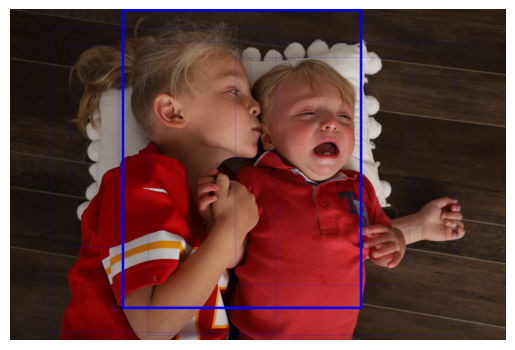

In [24]:

# Load and preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = F.to_tensor(img).unsqueeze(0)
    return img

image_path = '/content/FlamAssignment/IMG_0781.JPG'
image = preprocess_image(image_path)

# Perform inference
with torch.no_grad():
    prediction = model(image)

# Apply confidence threshold
confidence_threshold = 0.5
filtered_boxes = prediction[0]['boxes'][prediction[0]['scores'] > confidence_threshold].cpu().numpy()
labels = prediction[0]['labels'][prediction[0]['scores'] > confidence_threshold].cpu().numpy()

# Apply non-maximum suppression
nms_threshold = 0.5
keep = torchvision.ops.nms(torch.tensor(filtered_boxes), torch.tensor(prediction[0]['scores'][prediction[0]['scores'] > confidence_threshold]), nms_threshold)
filtered_boxes = filtered_boxes[keep]
labels = labels[keep]

# Load the original image
original_image = Image.open(image_path)

# Draw bounding boxes on the image
draw = ImageDraw.Draw(original_image)
for box, label in zip(filtered_boxes, labels):
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='blue', width=2)
    draw.text((box[0], box[1]), f'Class {label}', fill='blue')

# Save or display the image with bounding boxes
original_image.show()

# If you want to save the image:
original_image.save('output_image.jpg')

# If you want to display the image using matplotlib:
plt.imshow(original_image)
plt.axis('off')
plt.show()


<ipython-input-27-2f8149994f3e>:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  keep = torchvision.ops.nms(torch.tensor(filtered_boxes), torch.tensor(prediction[0]['scores'][prediction[0]['scores'] > confidence_threshold]), nms_threshold)


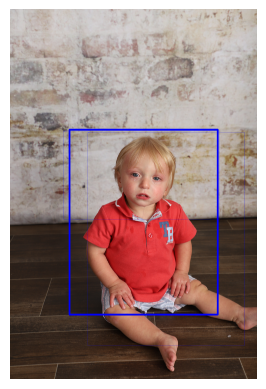

In [27]:

# Load and preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = F.to_tensor(img).unsqueeze(0)
    return img

image_path = '/content/FlamAssignment/IMG_0785.JPG'
image = preprocess_image(image_path)

# Perform inference
with torch.no_grad():
    prediction = model(image)

# Apply confidence threshold
confidence_threshold = 0.5
filtered_boxes = prediction[0]['boxes'][prediction[0]['scores'] > confidence_threshold].cpu().numpy()
labels = prediction[0]['labels'][prediction[0]['scores'] > confidence_threshold].cpu().numpy()

# Apply non-maximum suppression
nms_threshold = 0.5
keep = torchvision.ops.nms(torch.tensor(filtered_boxes), torch.tensor(prediction[0]['scores'][prediction[0]['scores'] > confidence_threshold]), nms_threshold)
filtered_boxes = filtered_boxes[keep]
labels = labels[keep]

# Load the original image
original_image = Image.open(image_path)

# Draw bounding boxes on the image
draw = ImageDraw.Draw(original_image)
for box, label in zip(filtered_boxes, labels):
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='blue', width=2)
    draw.text((box[0], box[1]), f'Class {label}', fill='blue')

# Save or display the image with bounding boxes
original_image.show()

# If you want to save the image:
original_image.save('output_image.jpg')

# If you want to display the image using matplotlib:
plt.imshow(original_image)
plt.axis('off')
plt.show()


<ipython-input-32-8fb3ef8e6a3a>:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  keep = torchvision.ops.nms(torch.tensor(filtered_boxes), torch.tensor(prediction[0]['scores'][prediction[0]['scores'] > confidence_threshold]), nms_threshold)


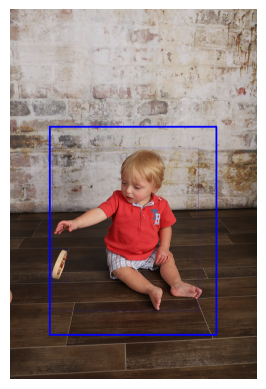

In [32]:

# Load and preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = F.to_tensor(img).unsqueeze(0)
    return img

image_path = '/content/FlamAssignment/IMG_0789.JPG'
image = preprocess_image(image_path)

# Perform inference
with torch.no_grad():
    prediction = model(image)

# Apply confidence threshold
confidence_threshold = 0.5
filtered_boxes = prediction[0]['boxes'][prediction[0]['scores'] > confidence_threshold].cpu().numpy()
labels = prediction[0]['labels'][prediction[0]['scores'] > confidence_threshold].cpu().numpy()

# Apply non-maximum suppression
nms_threshold = 0.5
keep = torchvision.ops.nms(torch.tensor(filtered_boxes), torch.tensor(prediction[0]['scores'][prediction[0]['scores'] > confidence_threshold]), nms_threshold)
filtered_boxes = filtered_boxes[keep]
labels = labels[keep]

# Load the original image
original_image = Image.open(image_path)

# Draw bounding boxes on the image
draw = ImageDraw.Draw(original_image)
for box, label in zip(filtered_boxes, labels):
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='blue', width=2)
    draw.text((box[0], box[1]), f'Class {label}', fill='blue')

# Save or display the image with bounding boxes
original_image.show()

# If you want to save the image:
original_image.save('output_image.jpg')

# If you want to display the image using matplotlib:
plt.imshow(original_image)
plt.axis('off')
plt.show()


<ipython-input-36-e279d97407fa>:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  keep = torchvision.ops.nms(torch.tensor(filtered_boxes), torch.tensor(prediction[0]['scores'][prediction[0]['scores'] > confidence_threshold]), nms_threshold)


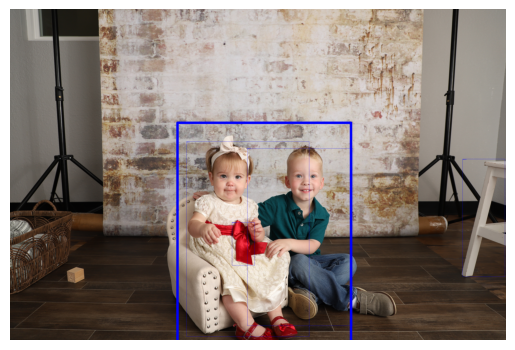

In [36]:

# Load and preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = F.to_tensor(img).unsqueeze(0)
    return img

image_path = '/content/FlamAssignment/IMG_0837.JPG'
image = preprocess_image(image_path)

# Perform inference
with torch.no_grad():
    prediction = model(image)

# Apply confidence threshold
confidence_threshold = 0.5
filtered_boxes = prediction[0]['boxes'][prediction[0]['scores'] > confidence_threshold].cpu().numpy()
labels = prediction[0]['labels'][prediction[0]['scores'] > confidence_threshold].cpu().numpy()

# Apply non-maximum suppression
nms_threshold = 0.5
keep = torchvision.ops.nms(torch.tensor(filtered_boxes), torch.tensor(prediction[0]['scores'][prediction[0]['scores'] > confidence_threshold]), nms_threshold)
filtered_boxes = filtered_boxes[keep]
labels = labels[keep]

# Load the original image
original_image = Image.open(image_path)

# Draw bounding boxes on the image
draw = ImageDraw.Draw(original_image)
for box, label in zip(filtered_boxes, labels):
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='blue', width=2)
    draw.text((box[0], box[1]), f'Class {label}', fill='blue')

# Save or display the image with bounding boxes
original_image.show()

# If you want to save the image:
original_image.save('output_image.jpg')

# If you want to display the image using matplotlib:
plt.imshow(original_image)
plt.axis('off')
plt.show()


<ipython-input-37-f36457bee41f>:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  keep = torchvision.ops.nms(torch.tensor(filtered_boxes), torch.tensor(prediction[0]['scores'][prediction[0]['scores'] > confidence_threshold]), nms_threshold)


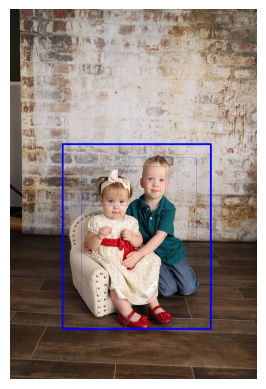

In [37]:

# Load and preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = F.to_tensor(img).unsqueeze(0)
    return img

image_path = '/content/FlamAssignment/IMG_0839.JPG'
image = preprocess_image(image_path)

# Perform inference
with torch.no_grad():
    prediction = model(image)

# Apply confidence threshold
confidence_threshold = 0.5
filtered_boxes = prediction[0]['boxes'][prediction[0]['scores'] > confidence_threshold].cpu().numpy()
labels = prediction[0]['labels'][prediction[0]['scores'] > confidence_threshold].cpu().numpy()

# Apply non-maximum suppression
nms_threshold = 0.5
keep = torchvision.ops.nms(torch.tensor(filtered_boxes), torch.tensor(prediction[0]['scores'][prediction[0]['scores'] > confidence_threshold]), nms_threshold)
filtered_boxes = filtered_boxes[keep]
labels = labels[keep]

# Load the original image
original_image = Image.open(image_path)

# Draw bounding boxes on the image
draw = ImageDraw.Draw(original_image)
for box, label in zip(filtered_boxes, labels):
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='blue', width=2)
    draw.text((box[0], box[1]), f'Class {label}', fill='blue')

# Save or display the image with bounding boxes
original_image.show()

# If you want to save the image:
original_image.save('output_image.jpg')

# If you want to display the image using matplotlib:
plt.imshow(original_image)
plt.axis('off')
plt.show()


<ipython-input-38-28fdc7c76a27>:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  keep = torchvision.ops.nms(torch.tensor(filtered_boxes), torch.tensor(prediction[0]['scores'][prediction[0]['scores'] > confidence_threshold]), nms_threshold)


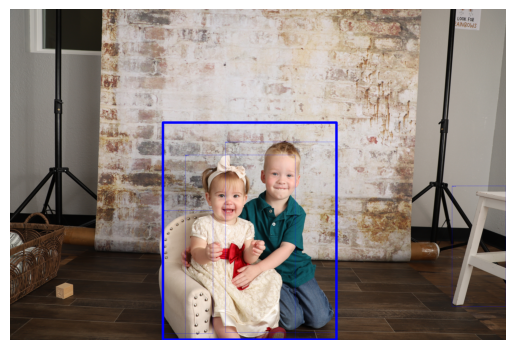

In [38]:

# Load and preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = F.to_tensor(img).unsqueeze(0)
    return img

image_path = '/content/FlamAssignment/IMG_0843.JPG'
image = preprocess_image(image_path)

# Perform inference
with torch.no_grad():
    prediction = model(image)

# Apply confidence threshold
confidence_threshold = 0.5
filtered_boxes = prediction[0]['boxes'][prediction[0]['scores'] > confidence_threshold].cpu().numpy()
labels = prediction[0]['labels'][prediction[0]['scores'] > confidence_threshold].cpu().numpy()

# Apply non-maximum suppression
nms_threshold = 0.5
keep = torchvision.ops.nms(torch.tensor(filtered_boxes), torch.tensor(prediction[0]['scores'][prediction[0]['scores'] > confidence_threshold]), nms_threshold)
filtered_boxes = filtered_boxes[keep]
labels = labels[keep]

# Load the original image
original_image = Image.open(image_path)

# Draw bounding boxes on the image
draw = ImageDraw.Draw(original_image)
for box, label in zip(filtered_boxes, labels):
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='blue', width=2)
    draw.text((box[0], box[1]), f'Class {label}', fill='blue')

# Save or display the image with bounding boxes
original_image.show()

# If you want to save the image:
original_image.save('output_image.jpg')

# If you want to display the image using matplotlib:
plt.imshow(original_image)
plt.axis('off')
plt.show()


<ipython-input-39-f8e330d2afdf>:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  keep = torchvision.ops.nms(torch.tensor(filtered_boxes), torch.tensor(prediction[0]['scores'][prediction[0]['scores'] > confidence_threshold]), nms_threshold)


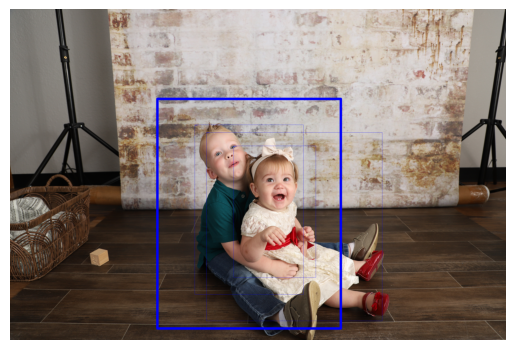

In [39]:

# Load and preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = F.to_tensor(img).unsqueeze(0)
    return img

image_path = '/content/FlamAssignment/IMG_0848.JPG'
image = preprocess_image(image_path)

# Perform inference
with torch.no_grad():
    prediction = model(image)

# Apply confidence threshold
confidence_threshold = 0.5
filtered_boxes = prediction[0]['boxes'][prediction[0]['scores'] > confidence_threshold].cpu().numpy()
labels = prediction[0]['labels'][prediction[0]['scores'] > confidence_threshold].cpu().numpy()

# Apply non-maximum suppression
nms_threshold = 0.5
keep = torchvision.ops.nms(torch.tensor(filtered_boxes), torch.tensor(prediction[0]['scores'][prediction[0]['scores'] > confidence_threshold]), nms_threshold)
filtered_boxes = filtered_boxes[keep]
labels = labels[keep]

# Load the original image
original_image = Image.open(image_path)

# Draw bounding boxes on the image
draw = ImageDraw.Draw(original_image)
for box, label in zip(filtered_boxes, labels):
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='blue', width=2)
    draw.text((box[0], box[1]), f'Class {label}', fill='blue')

# Save or display the image with bounding boxes
original_image.show()

# If you want to save the image:
original_image.save('output_image.jpg')

# If you want to display the image using matplotlib:
plt.imshow(original_image)
plt.axis('off')
plt.show()


<ipython-input-40-a46740eb18c5>:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  keep = torchvision.ops.nms(torch.tensor(filtered_boxes), torch.tensor(prediction[0]['scores'][prediction[0]['scores'] > confidence_threshold]), nms_threshold)


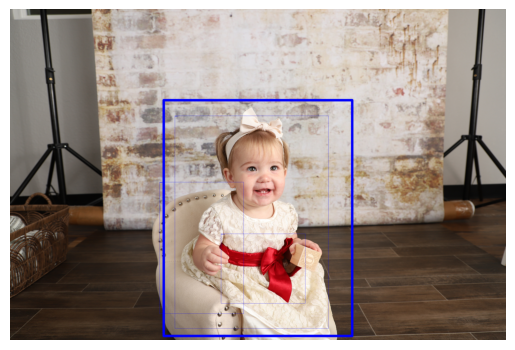

In [40]:

# Load and preprocess the image
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = F.to_tensor(img).unsqueeze(0)
    return img

image_path = '/content/FlamAssignment/IMG_0854.JPG'
image = preprocess_image(image_path)

# Perform inference
with torch.no_grad():
    prediction = model(image)

# Apply confidence threshold
confidence_threshold = 0.5
filtered_boxes = prediction[0]['boxes'][prediction[0]['scores'] > confidence_threshold].cpu().numpy()
labels = prediction[0]['labels'][prediction[0]['scores'] > confidence_threshold].cpu().numpy()

# Apply non-maximum suppression
nms_threshold = 0.5
keep = torchvision.ops.nms(torch.tensor(filtered_boxes), torch.tensor(prediction[0]['scores'][prediction[0]['scores'] > confidence_threshold]), nms_threshold)
filtered_boxes = filtered_boxes[keep]
labels = labels[keep]

# Load the original image
original_image = Image.open(image_path)

# Draw bounding boxes on the image
draw = ImageDraw.Draw(original_image)
for box, label in zip(filtered_boxes, labels):
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='blue', width=2)
    draw.text((box[0], box[1]), f'Class {label}', fill='blue')

# Save or display the image with bounding boxes
original_image.show()

# If you want to save the image:
original_image.save('output_image.jpg')

# If you want to display the image using matplotlib:
plt.imshow(original_image)
plt.axis('off')
plt.show()
